Description of the dataset:

Objective:

Summary:


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import time
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier#, plot_
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline
warnings.filterwarnings('ignore')

In [45]:
#Loading your dataset
data = pd.read_csv("C:/Users/luengoag/Desktop/Private/Python/breast_cancer/breast_cancer.csv")
data.shape

(569, 33)

In [47]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [48]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
#Removing extra column with Null values
data = data.drop(columns='Unnamed: 32',axis='columns')

([<matplotlib.patches.Wedge at 0x21f602c9e90>,
 [Text(-2.072132428157646, -0.8767937044581808, 'Benign'),
  Text(2.072132510248988, 0.8767935104511373, 'Malignant')],
 [Text(-1.151184682309803, -0.48710761358787813, '62.74%'),
  Text(1.1511847279161043, 0.4871075058061874, '37.26%')])

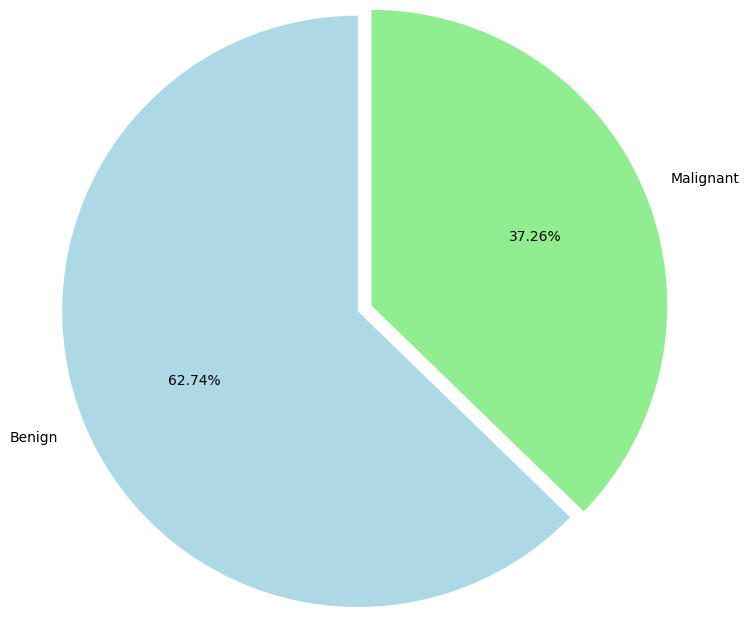

In [43]:
# Diagnosis Distribution

# Bar chart
# sns.countplot(data=data, x='diagnosis', hue='diagnosis')

# Pie chart
plt.pie(data['diagnosis'].value_counts(), startangle=90, explode=[0.05, 0.05], autopct='%0.2f%%',
        labels=['Benign', 'Malignant'], colors=['#add8e6', '#90ee90'], radius=2)

In [5]:
#Encoding the diagnosis column to be used as a numeric variable.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

psd_data = data.copy().drop(columns='diagnosis', axis="columns")
psd_data['diagnosis'] = le.fit_transform(data['diagnosis'])

In [7]:
#Reviewing correlation between variables
correlation = psd_data.corr()

<Axes: >

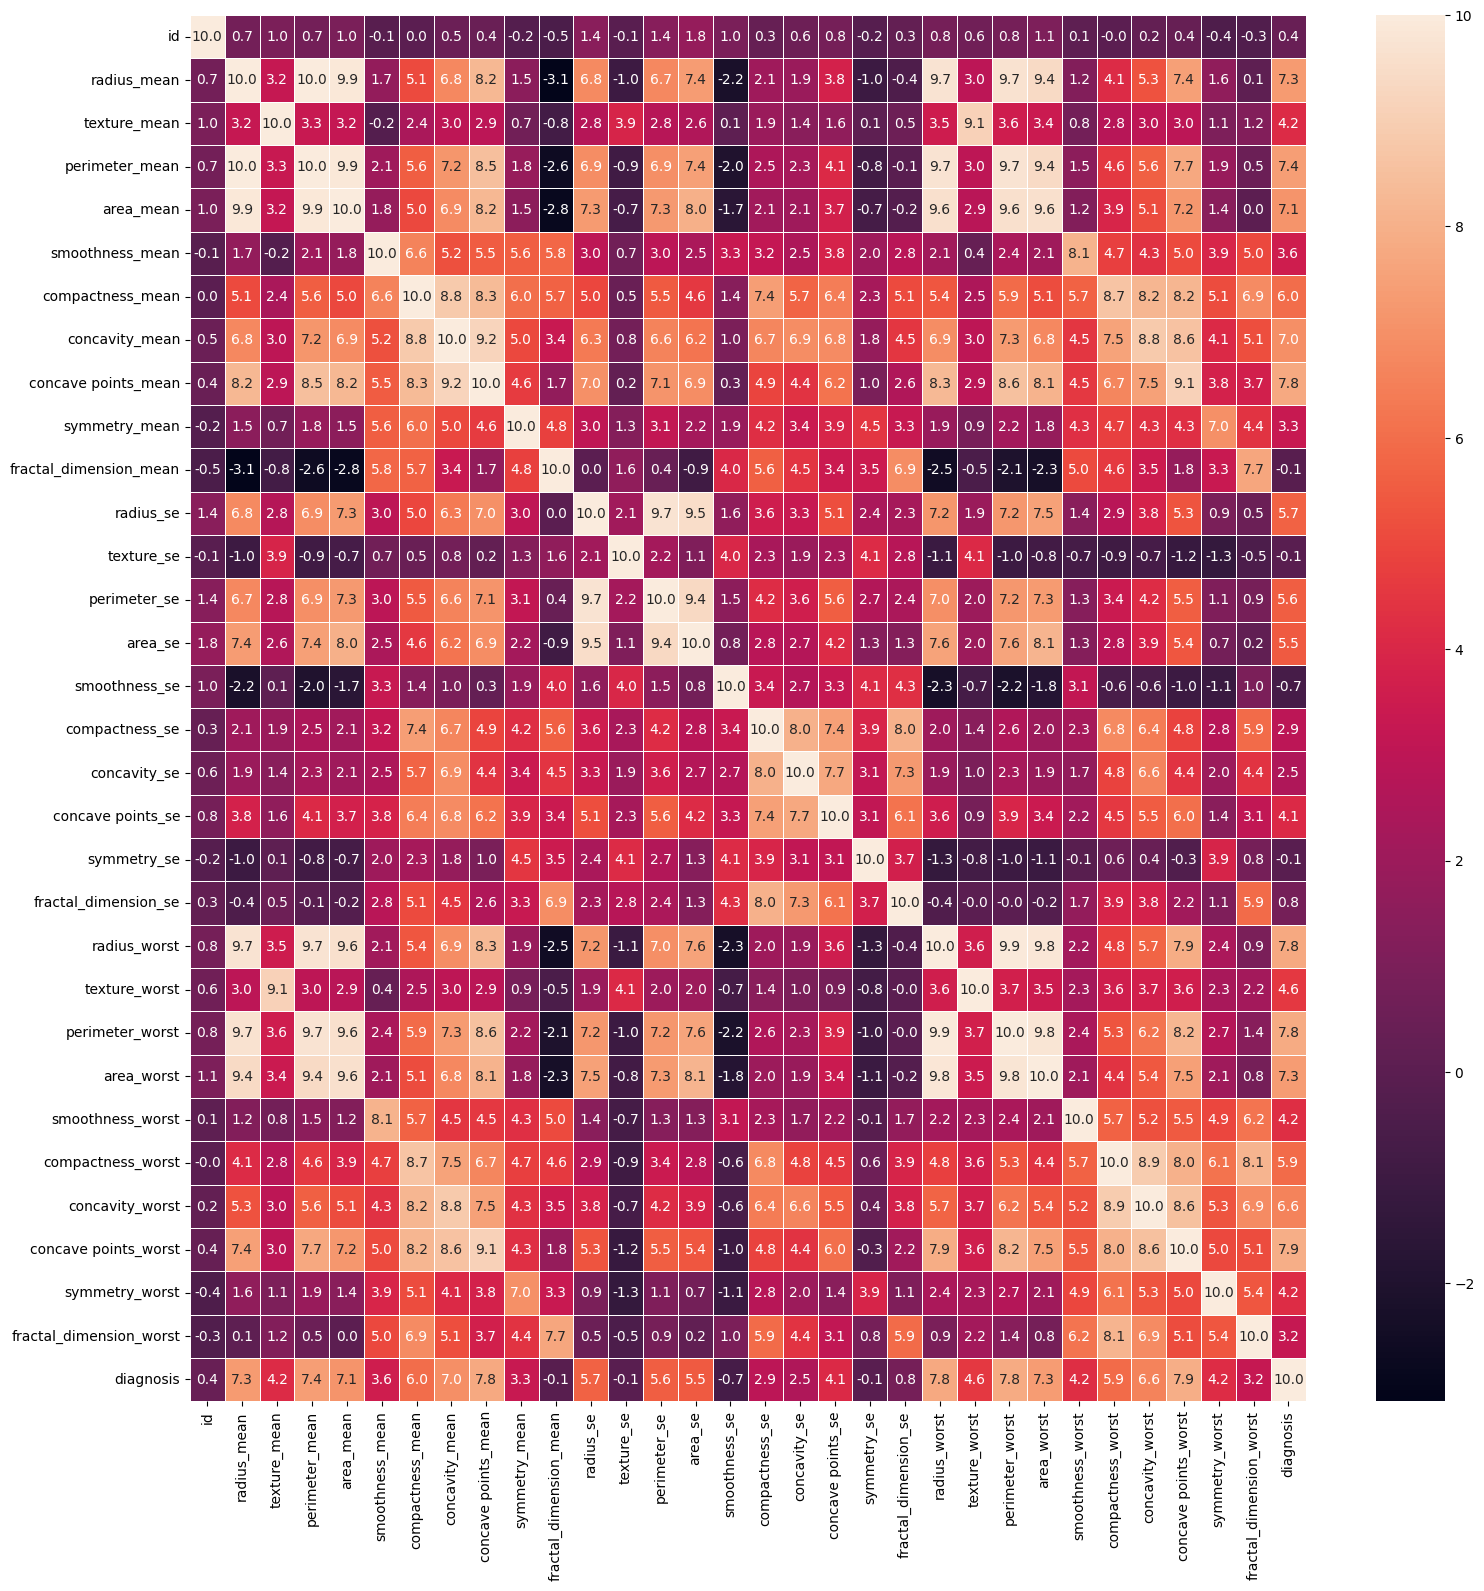

In [8]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data=correlation*10, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [52]:
#extracting the variables with the highest correlation
corr_data = pd.DataFrame(correlation)
high_corr = corr_data['diagnosis'][corr_data['diagnosis']*100 > 70]*100
high_corr.sort_values(ascending=False)

diagnosis               100.000000
concave points_worst     79.356602
perimeter_worst          78.291414
concave points_mean      77.661384
radius_worst             77.645378
perimeter_mean           74.263553
area_worst               73.382503
radius_mean              73.002851
area_mean                70.898384
Name: diagnosis, dtype: float64

In [53]:
high_corr_psd_data = psd_data[high_corr.index]
high_corr_psd_data

,radius_mean,perimeter_mean,area_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.0,0.14710,25.380,184.60,2019.0,0.2654,1
1,20.57,132.90,1326.0,0.07017,24.990,158.80,1956.0,0.1860,1
2,19.69,130.00,1203.0,0.12790,23.570,152.50,1709.0,0.2430,1
3,11.42,77.58,386.1,0.10520,14.910,98.87,567.7,0.2575,1
4,20.29,135.10,1297.0,0.10430,22.540,152.20,1575.0,0.1625,1
...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.13890,25.450,166.10,2027.0,0.2216,1
565,20.13,131.20,1261.0,0.09791,23.690,155.00,1731.0,0.1628,1
566,16.60,108.30,858.1,0.05302,18.980,126.70,1124.0,0.1418,1
567,20.60,140.10,1265.0,0.15200,25.740,184.60,1821.0,0.2650,1


In [54]:
#As the radius_worst and perimeter_worst have a very high correlation (logically) I will remove 'radius_worst'
high_corr_psd_data = psd_data[high_corr.index].drop('radius_worst', axis='columns')

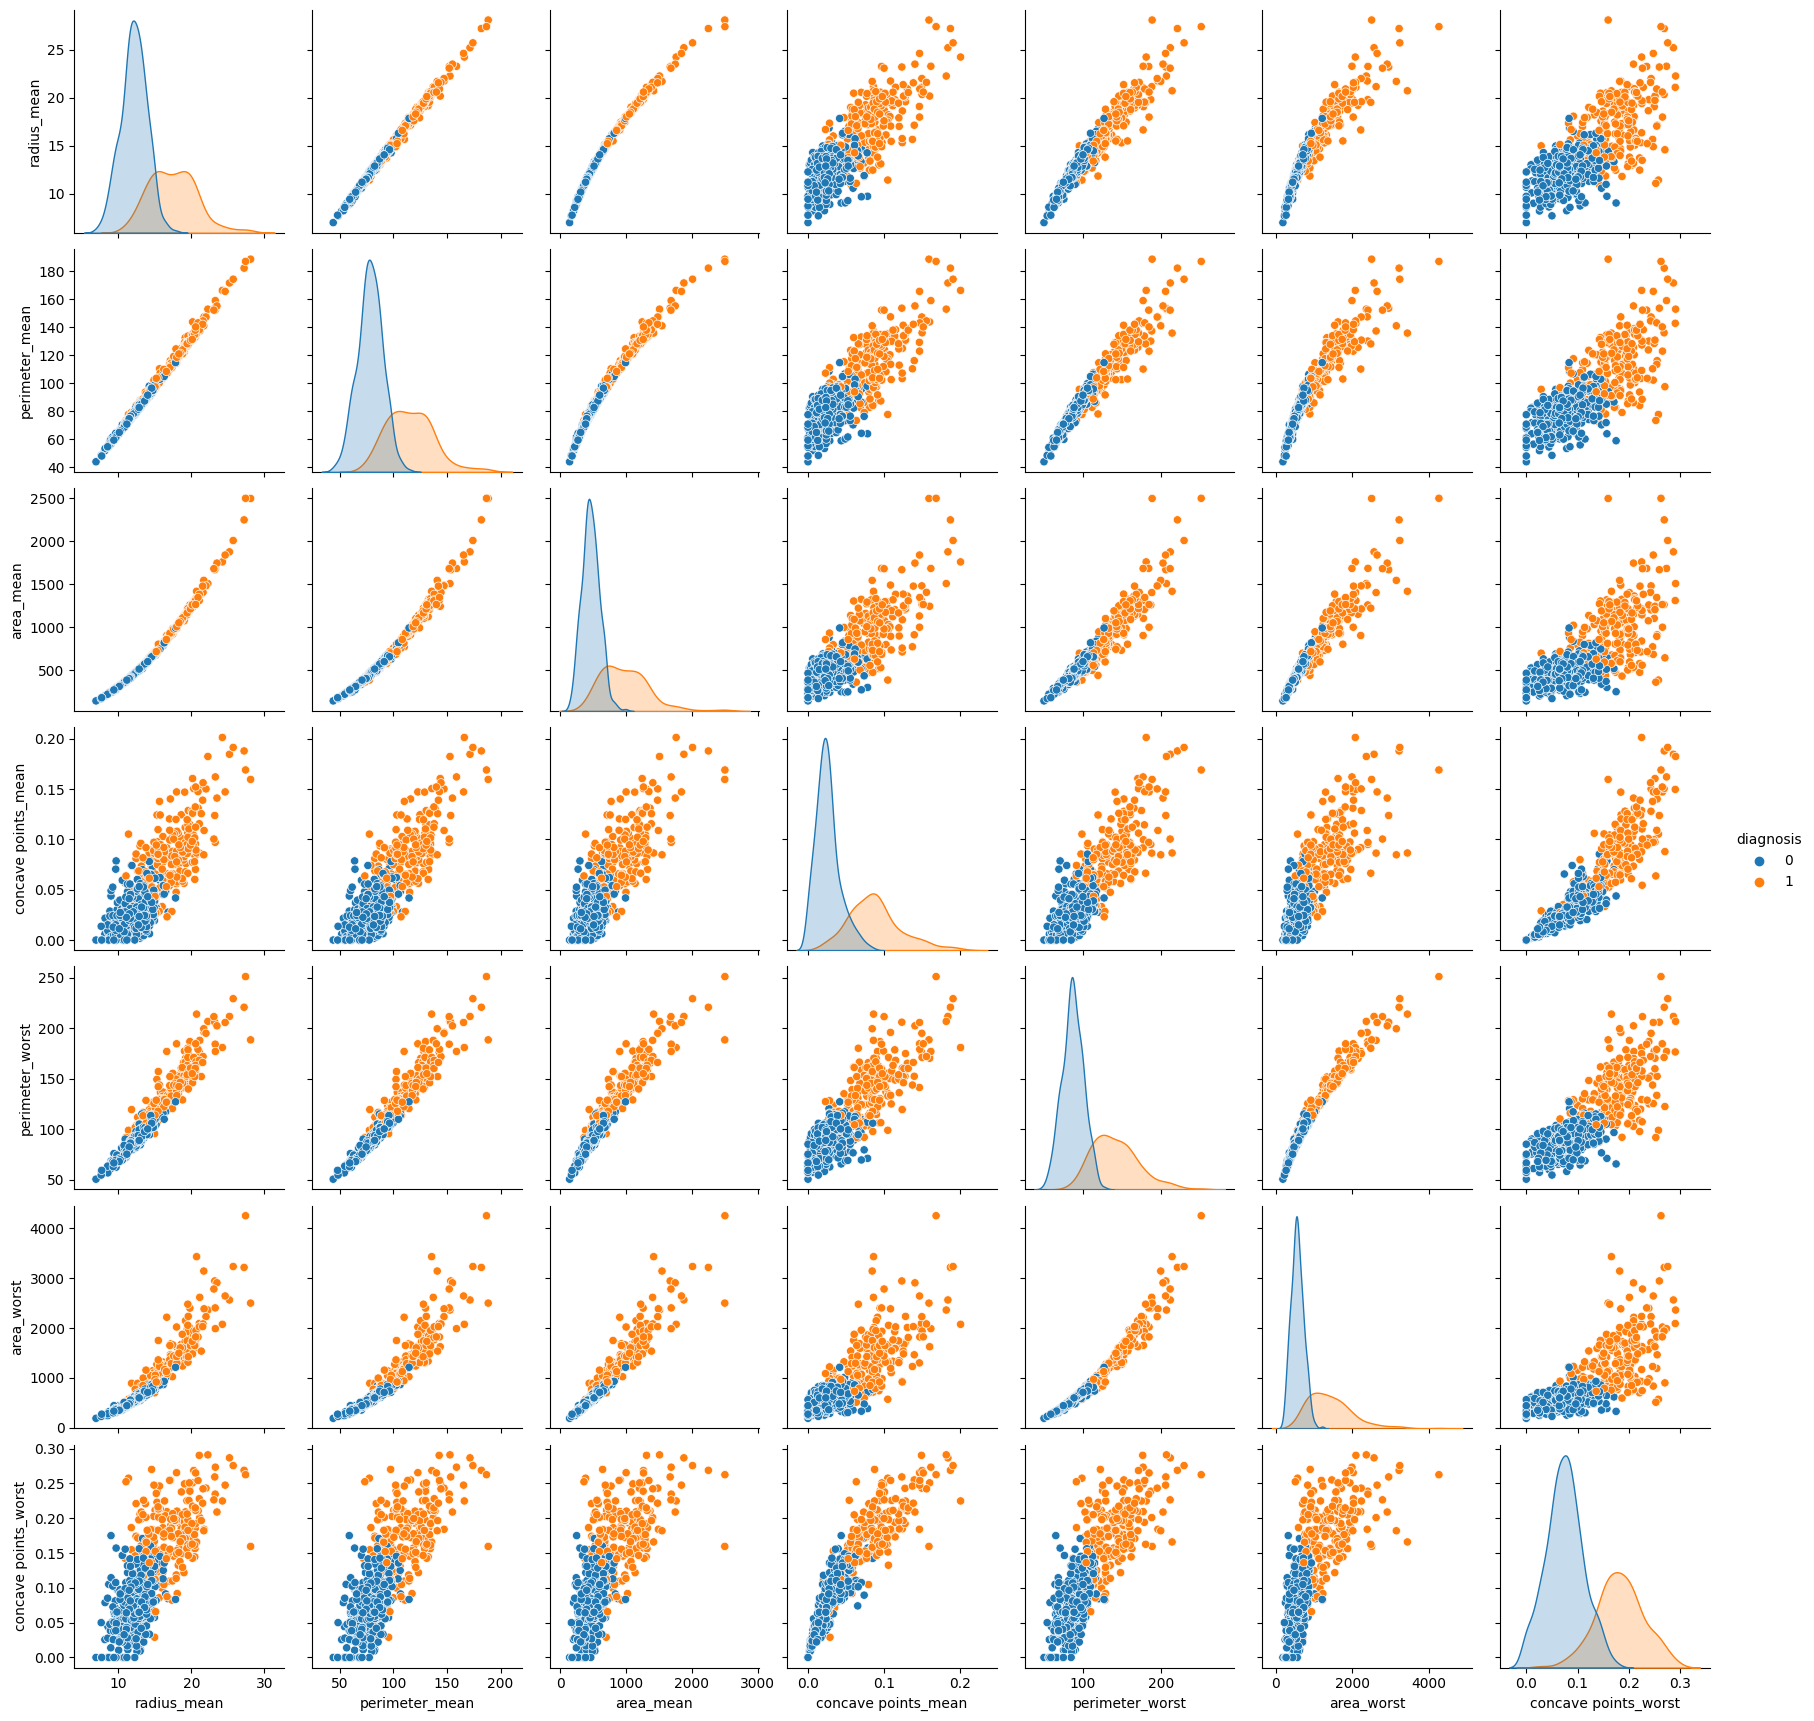

In [55]:
#Plotting general view of the data
sns.pairplot(data=high_corr_psd_data,hue='diagnosis')

Text(0.5, 1.0, 'Boxplot')

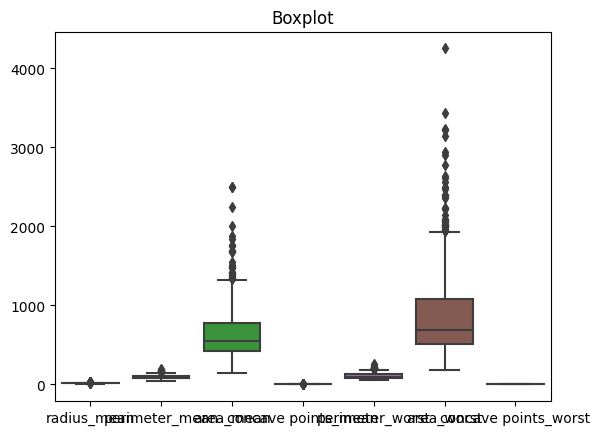

In [56]:
sns.boxplot(data=high_corr_psd_data.drop('diagnosis',axis='columns')).set_title('Boxplot')

#We can see outliers in perimeter worst and radius worst

In [57]:
data['perimeter_worst'].describe()

count    569.000000
mean     107.261213
std       33.602542
min       50.410000
25%       84.110000
50%       97.660000
75%      125.400000
max      251.200000
Name: perimeter_worst, dtype: float64

([0, 1, 2],
 [Text(0, 0, 'concave points_mean'),
  Text(1, 0, 'perimeter_worst'),
  Text(2, 0, 'concave points_worst')])

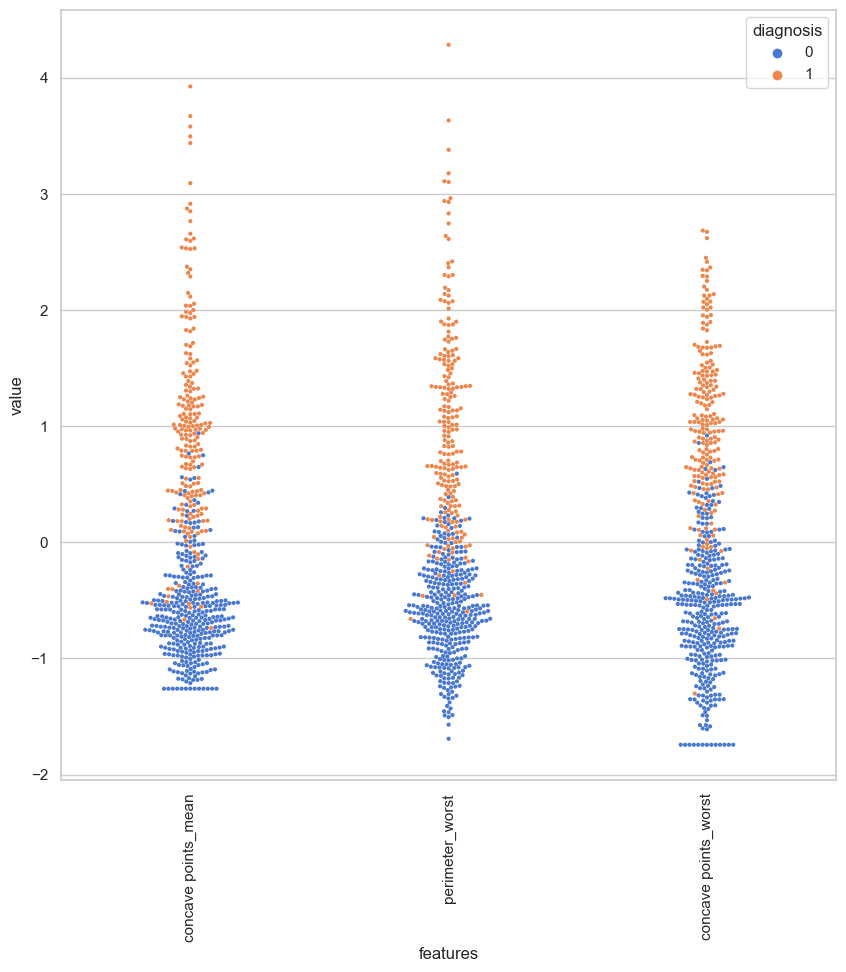

In [58]:
data_dia = data['diagnosis']
swarmplt_mean = data[['concave points_mean','perimeter_worst','concave points_worst']]

# standardization
# subtracting the mean and dividing by the standard deviation. This ensures that all features have a mean of 0 and a standard deviation of 1.
data_n_2 = (swarmplt_mean - swarmplt_mean.mean()) / swarmplt_mean.std()

#concat the standardized features with the target variable diagnosis.
swarmplt_mean = pd.concat([y, data_n_2.iloc[:, 0:10]], axis=1)

#from wide format to long format, making it suitable for Seaborn plotting functions.
swarmplt_mean = pd.melt(swarmplt_mean, id_vars="diagnosis", var_name="features", value_name='value')

plt.figure(figsize=(10, 10))
sns.set(style="whitegrid", palette="muted")

# Reduce marker size
sns.swarmplot(x="features", y="value", hue="diagnosis", data=swarmplt_mean, size=3)

plt.xticks(rotation=90)

In [26]:
#extracting the variables with the highest correlation
corr_rate = [65,70,75]

for i in corr_rate:
    print((corr_data['diagnosis'][corr_data['diagnosis']*100 > i]*100).count(), 'variables')

11 variables
9 variables
5 variables


In [42]:
#extracting the variables with the highest correlation
corr_data = pd.DataFrame(correlation)
corr_rate = [65,70,75]

separator = '-' * 69

for i in corr_rate:
    high_corr = corr_data['diagnosis'][corr_data['diagnosis']*100 > i]*100
    high_corr_psd_data = psd_data[high_corr.index]
    high_corr_psd_data = psd_data[high_corr.index].drop('radius_worst', axis='columns')
        # Split the dataset into features (X) and target variable (y)
    X = high_corr_psd_data.drop(columns=['diagnosis'])  # Features
    y = high_corr_psd_data['diagnosis']  # Target variable
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    
    svc_model = SVC(kernel='linear',decision_function_shape='ovo')
    svc_model.fit(X_train, y_train)
    
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    
    knn_model = KNeighborsClassifier(n_neighbors=2)
    knn_model.fit(X_train, y_train)
    
    # lr_model = LogisticRegression()
    # lr.fit(X_train, y_train)

    model_accuracies = {}
    model_precision = {}
    model_recall = {}
    model_f1 = {}
    
    models = {'dt_model':dt_model,
     'rf_model':rf_model,
    'svc_model':svc_model,
    'nb_model':nb_model,
    'knn_model':knn_model
    #'lr_model':lr_model
             }
    
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test,y_pred)
        f1 = f1_score(y_test,y_pred)
        model_accuracies[model_name] = accuracy*100
        model_precision[model_name] = precision*100
        model_recall[model_name] = recall*100
        model_f1[model_name] = f1*100
    
    acc = pd.DataFrame.from_dict(model_accuracies, orient='Index', columns=['Accuracy'])
    prec = pd.DataFrame.from_dict(model_precision, orient='Index', columns=['Precision'])
    rec = pd.DataFrame.from_dict(model_recall, orient='Index', columns=['Recall'])
    f1 = pd.DataFrame.from_dict(model_f1, orient='Index', columns=['F1_Score'])
    report = pd.concat([acc, prec, rec, f1], axis=1, join='inner')
    
    print(f'with {high_corr.count()} variables: ', report, f'\n{separator}\n')

with 11 variables:              Accuracy   Precision     Recall   F1_Score
dt_model   93.859649   92.857143  90.697674  91.764706
rf_model   95.614035   95.238095  93.023256  94.117647
svc_model  99.122807  100.000000  97.674419  98.823529
nb_model   97.368421  100.000000  93.023256  96.385542
knn_model  92.105263   94.736842  83.720930  88.888889 
---------------------------------------------------------------------

with 9 variables:              Accuracy   Precision     Recall   F1_Score
dt_model   93.859649   90.909091  93.023256  91.954023
rf_model   96.491228   95.348837  95.348837  95.348837
svc_model  98.245614  100.000000  95.348837  97.619048
nb_model   96.491228  100.000000  90.697674  95.121951
knn_model  92.105263   94.736842  83.720930  88.888889 
---------------------------------------------------------------------

with 5 variables:              Accuracy   Precision     Recall   F1_Score
dt_model   91.228070   86.666667  90.697674  88.636364
rf_model   94.736842   95.12

Glossary:
    TPTP = True Positives
    TNTN = True Negatives
    FPFP = False Positives
    FNFN = False Negatives

1. Accuracy is the ratio of correctly predicted instances (both true positives and true negatives) to the total instances. It measures the overall correctness of the model.

Formula:
Accuracy=TP+TNTP+TN+FP+FN
Accuracy=TP+TN+FP+FNTP+TN​

2. Precision is the ratio of correctly predicted positive instances to the total predicted positive instances. It measures how many of the positively predicted instances are actually positive.

Formula:
Precision=TPTP+FP
Precision=TP+FPTP​

3. Recall is the ratio of correctly predicted positive instances to all actual positive instances. It measures how many of the actual positive instances were correctly identified by the model.

Formula:
Recall=TPTP+FN
Recall=TP+FNTP​

4. The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, which is useful when you need a balance between the two or when the class distribution is imbalanced.

Formula:
F1 Score=2×Precision×RecallPrecision+Recall
F1 Score=2×Precision+RecallPrecision×Recall​

In [36]:
# Generate the confusion matrix

high_corr = corr_data['diagnosis'][corr_data['diagnosis']*100 > 60]*100
high_corr_psd_data = psd_data[high_corr.index]
high_corr_psd_data = psd_data[high_corr.index].drop('radius_worst', axis='columns')
    # Split the dataset into features (X) and target variable (y)
X = high_corr_psd_data.drop(columns=['diagnosis'])  # Features
y = high_corr_psd_data['diagnosis']  # Target variable
    
    # Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc_model = SVC(kernel='linear',decision_function_shape='ovo')
svc_model.fit(X_train, y_train)

SVC(decision_function_shape='ovo', kernel='linear')

Confusion Matrix:

            Predicted
              |  Negative  |  Positive  |
-----------------------------------------
Actual Negative |   TN      |    FP      |
-----------------------------------------
Actual Positive |   FN      |    TP      |

In [41]:
svc_y_pred = svc_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, svc_y_pred)
print(f'with {high_corr.count()} variables: \nConfusion Matrix: \n {conf_matrix}\n')

with 15 variables: 
Confusion Matrix: 
 [[71  0]
 [ 1 42]]

